1. A Cayley tree is a symmetric regular tree in which each vertex is connected to the same
number k of others, until we get out to the leaves, like the figure below, with k = 3. Show
that the number of vertices reachable in d steps from the central vertex is 𝑘(𝑘 − 1)𝑑−1 for
d ≥ 1. Then give an expression for the diameter of the network in terms of k and the number
of vertices n. State whether this network displays the “small-world effect,” defined as
having a diameter that increases as O(log n) or slower

In [2]:
import numpy as np
import random
import networkx as nx
from IPython.display import Image
import matplotlib.pyplot as plt
import math


#### For displaying graphs
https://stackoverflow.com/questions/29586520/can-one-get-hierarchical-graphs-from-networkx-with-python-3/29597209

In [3]:

def hierarchy_pos(G, root=None, width=1., vert_gap = 0.2, vert_loc = 0, xcenter = 0.5):
    '''
    From Joel's answer at https://stackoverflow.com/a/29597209/2966723.  
    Licensed under Creative Commons Attribution-Share Alike 
    
    If the graph is a tree this will return the positions to plot this in a 
    hierarchical layout.
    
    G: the graph (must be a tree)
    
    root: the root node of current branch 
    - if the tree is directed and this is not given, 
      the root will be found and used
    - if the tree is directed and this is given, then 
      the positions will be just for the descendants of this node.
    - if the tree is undirected and not given, 
      then a random choice will be used.
    
    width: horizontal space allocated for this branch - avoids overlap with other branches
    
    vert_gap: gap between levels of hierarchy
    
    vert_loc: vertical location of root
    
    xcenter: horizontal location of root
    '''
    if not nx.is_tree(G):
        raise TypeError('cannot use hierarchy_pos on a graph that is not a tree')

    if root is None:
        if isinstance(G, nx.DiGraph):
            root = next(iter(nx.topological_sort(G)))  #allows back compatibility with nx version 1.11
        else:
            root = random.choice(list(G.nodes))

    def _hierarchy_pos(G, root, width=1., vert_gap = 0.2, vert_loc = 0, xcenter = 0.5, pos = None, parent = None):
        '''
        see hierarchy_pos docstring for most arguments

        pos: a dict saying where all nodes go if they have been assigned
        parent: parent of this branch. - only affects it if non-directed

        '''
    
        if pos is None:
            pos = {root:(xcenter,vert_loc)}
        else:
            pos[root] = (xcenter, vert_loc)
        children = list(G.neighbors(root))
        if not isinstance(G, nx.DiGraph) and parent is not None:
            children.remove(parent)  
        if len(children)!=0:
            dx = width/len(children) 
            nextx = xcenter - width/2 - dx/2
            for child in children:
                nextx += dx
                pos = _hierarchy_pos(G,child, width = dx, vert_gap = vert_gap, 
                                    vert_loc = vert_loc-vert_gap, xcenter=nextx,
                                    pos=pos, parent = root)
        return pos

            
    return _hierarchy_pos(G, root, width, vert_gap, vert_loc, xcenter)

### A tree in which each non-leaf graph vertex has a constant number of branches n is called an n-Cayley tree. 2-Cayley trees are path graphs.

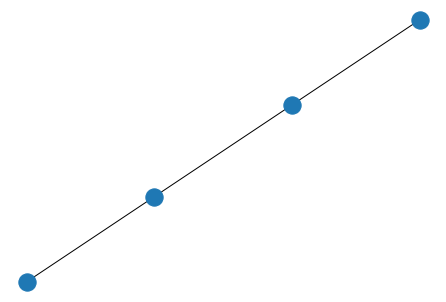

In [4]:
n=4
G= nx.path_graph(n, create_using=None)
plt.figure()
nx.draw(G)


### The unique n-Cayley tree on n+1 nodes is the star graph. 


			4-Cayley


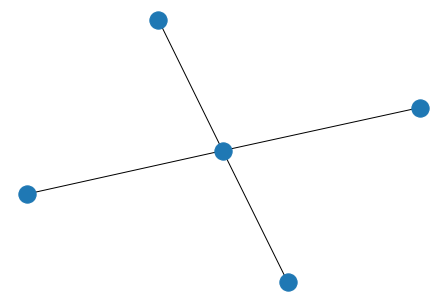

In [5]:
n=4
G= nx.star_graph(n, create_using=None)
print("\n\t\t\t4-Cayley")
plt.figure()
nx.draw(G)


#### Binary trees on n=1, 2, ... nodes (i.e., n-node trees having vertex degree either 1 or 2; also called 3-Cayley trees, 3-valent trees, or boron trees)

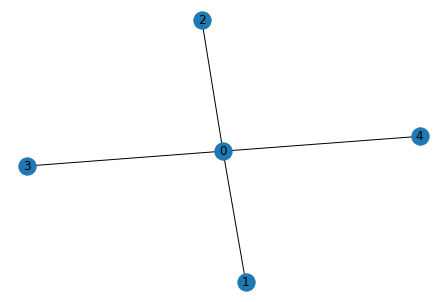

In [6]:
BinaryTree={0:[1,2,3,4],1:[],2:[],3:[],4:[]}
T=nx.Graph(BinaryTree)
plt.figure()
nx.draw(T,  with_labels=True)
plt.show()

#### Cayley tree with a branch missing from the central node...(when using balanced tree..)

	 3 Cayley tree with no of steps to reach leaf node = 4
	Balanced tree with branching factor-2 & height of the tree=4


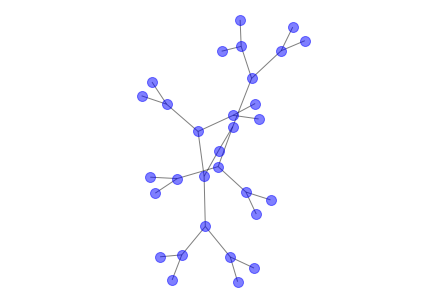

8


In [7]:
#Circular Tree
print("\t 3 Cayley tree with no of steps to reach leaf node = 4")
print("\tBalanced tree with branching factor-2 & height of the tree=4")
G=nx.balanced_tree(2,4)  #2- branching factor, 4 -height of the tree
plt.figure()
nx.draw(G,node_size=100,alpha=0.5,node_color="blue", with_labels=False)
plt.axis('equal')
#plt.savefig('circular_tree.png')
plt.show()
print(nx.diameter(G))

## Cayley tree with k=3

	 3 Cayley tree (k=3) with no of steps to reach leaf node = 5
	Balanced tree with branching factor-2 & height of the tree=5


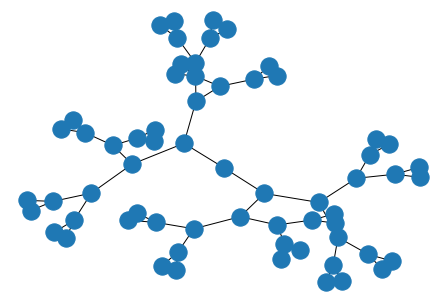

In [8]:
#Circular Tree
print("\t 3 Cayley tree (k=3) with no of steps to reach leaf node = 5")
print("\tBalanced tree with branching factor-2 & height of the tree=5")
T = nx.balanced_tree(2, 5)

nx.draw(T)
plt.show()

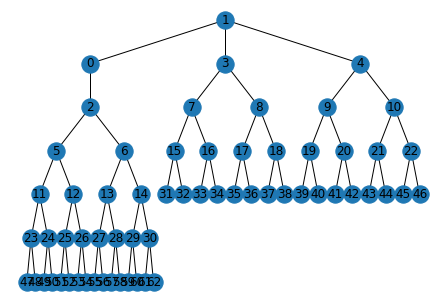

In [9]:
pos = hierarchy_pos(T,1)    
nx.draw(T, pos=pos, with_labels=True)
plt.show()
#plt.savefig('hierarchy.png')

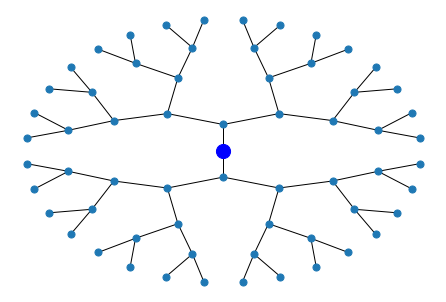

In [10]:
pos = hierarchy_pos(T, 0, width = 2*math.pi, xcenter=0)
new_pos = {u:(r*math.cos(theta),r*math.sin(theta)) for u, (theta, r) in pos.items()}
nx.draw(T, pos=new_pos, node_size = 50)
nx.draw_networkx_nodes(G, pos=new_pos, nodelist = [0], node_color = 'blue', node_size = 200)
plt.show()

In [11]:
# Get the list of the degrees
T = nx.balanced_tree(2, 5)

degree_sequence_erdos = list(T.degree())
nb_nodes = T.number_of_nodes()
nb_arr = len(T.edges())

avg_degree = np.mean(np.array(degree_sequence_erdos)[:,1])
med_degree = np.median(np.array(degree_sequence_erdos)[:,1])

max_degree = max(np.array(degree_sequence_erdos)[:,1])
min_degree = np.min(np.array(degree_sequence_erdos)[:,1])

print("Number of nodes : " + str(nb_nodes))
print("Number of edges : " + str(nb_arr))

print("Maximum degree : " + str(max_degree))
print("Minimum degree : " + str(min_degree))

print("Average degree : " + str(avg_degree))
print("Median degree : " + str(med_degree))

Number of nodes : 63
Number of edges : 62
Maximum degree : 3
Minimum degree : 1
Average degree : 1.9682539682539681
Median degree : 1.0


## Calculate diameter.
Then give an expression for the diameter of the network in terms of k and the number of vertices n.

## Show that the number of vertices reachable in d steps from the central vertex is 𝑘(𝑘 − 1)^𝑑−1 for d ≥ 1

3 Cayley tree with no of steps to reach leaf node = 4
Diameter  8
Number of nodes : 31




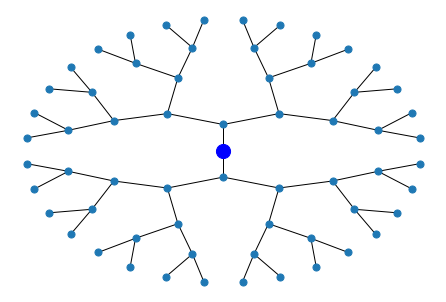

In [12]:
print("3 Cayley tree with no of steps to reach leaf node = 4")
G=nx.balanced_tree(2,4)
print("Diameter ",nx.diameter(G))
nb_nodes = G.number_of_nodes()
print("Number of nodes : " + str(nb_nodes))
print("\n")

pos = hierarchy_pos(T, 0, width = 2*math.pi, xcenter=0)
new_pos = {u:(r*math.cos(theta),r*math.sin(theta)) for u, (theta, r) in pos.items()}
nx.draw(T, pos=new_pos, node_size = 50)
nx.draw_networkx_nodes(G, pos=new_pos, nodelist = [0], node_color = 'blue', node_size = 200)
plt.show()

4 Cayley tree with no of steps to reach leaf node = 4
Diameter  8
Number of nodes : 121




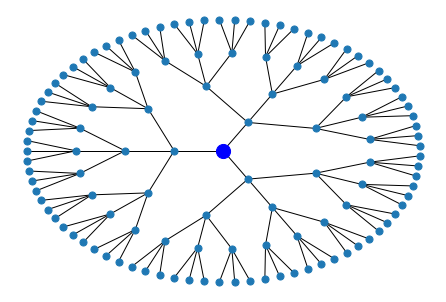

In [13]:
print("4 Cayley tree with no of steps to reach leaf node = 4")
T = nx.balanced_tree(3, 4)
print("Diameter ",nx.diameter(T))
nb_nodes = T.number_of_nodes()
print("Number of nodes : " + str(nb_nodes))
print("\n")

pos = hierarchy_pos(T, 0, width = 2*math.pi, xcenter=0)
new_pos = {u:(r*math.cos(theta),r*math.sin(theta)) for u, (theta, r) in pos.items()}
nx.draw(T, pos=new_pos, node_size = 50)
nx.draw_networkx_nodes(G, pos=new_pos, nodelist = [0], node_color = 'blue', node_size = 200)
plt.show()

3 Cayley tree with no of steps to reach leaf node = 5
Diameter  10
Number of nodes : 63




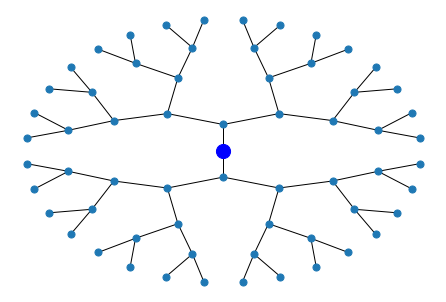

In [14]:
print("3 Cayley tree with no of steps to reach leaf node = 5")
T = nx.balanced_tree(2, 5)
print("Diameter ",nx.diameter(T))
nb_nodes = T.number_of_nodes()
print("Number of nodes : " + str(nb_nodes))
print("\n")

pos = hierarchy_pos(T, 0, width = 2*math.pi, xcenter=0)
new_pos = {u:(r*math.cos(theta),r*math.sin(theta)) for u, (theta, r) in pos.items()}
nx.draw(T, pos=new_pos, node_size = 50)
nx.draw_networkx_nodes(G, pos=new_pos, nodelist = [0], node_color = 'blue', node_size = 200)
plt.show()

### therefore diameter = branching factor * height of the tree (based on balanced tree parameters)

### diameter = (k-1)*2             (based on K Cayley k )

### From the above experiments it has been identified that number of vertices reachable in d steps = 𝑘(𝑘 − 1)^𝑑−1

### For example in the above graph of k=3, No of vertices reachable in 2 steps will be = 4
(This is becaues in the central node one edge is missing in balanced tree)
### from the formula (𝑘(𝑘 − 1)^𝑑−1) we get  = 6